In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as web
import seaborn as sns
from datetime import datetime
import yfinance as yf
yf.pdr_override()

In [58]:
# Lista de tickers
tickers = ["PETR4.SA", 'VALE3.SA', 'ITUB4.SA', 'BBAS3.SA', 'BBDC3.SA']

# Baixando os dados dos tickers
carteira_compra = yf.download(tickers, start="2002-01-01", end="2023-12-31")['Close']
carteira = yf.download(tickers, start="2002-01-01", end="2023-12-31")['Adj Close']

# Baixando os dados do índice Ibovespa
ibov = yf.download('^BVSP', start="2002-01-01", end="2023-12-31")['Adj Close']

[*********************100%***********************]  5 of 5 completed
[*********************100%***********************]  5 of 5 completed
[*********************100%***********************]  1 of 1 completed


In [59]:
acoes_num = (10000/ carteira_compra.iloc[0]).astype(int)
acoes_num
#acoes_num['PETR4.SA']

BBAS3.SA    5665
BBDC3.SA    5200
ITUB4.SA    3431
PETR4.SA    1564
VALE3.SA    2307
Name: 2002-01-01 00:00:00, dtype: int32

In [60]:
carteira.pct_change()

,BBAS3.SA,BBDC3.SA,ITUB4.SA,PETR4.SA,VALE3.SA
Date,,,,,
2002-01-01,NaN,NaN,NaN,NaN,NaN
2002-01-02,0.017941,0.000000,0.045513,0.001955,-0.019231
2002-01-03,0.015770,0.007614,-0.010924,0.006829,0.015686
2002-01-04,-0.022831,-0.003778,-0.016429,-0.006202,0.021236
2002-01-07,-0.022430,0.003793,-0.011117,0.021841,0.000000
...,...,...,...,...,...
2023-12-21,0.001476,-0.000646,0.006755,0.000275,0.033293
2023-12-22,0.002763,0.002486,0.015858,0.009618,-0.007535
2023-12-26,0.009184,0.003987,0.010207,0.016059,0.003535


In [61]:
carteira_normalizada = (carteira / carteira.iloc[0])*10000
ibov_normalizado = (ibov / ibov.iloc[0])*50000

In [62]:
resultados_vendacoberta = pd.read_json(r'C:\Users\cptfr\Desktop\TCC_B3_OPCOES\estrategias\resultados_vendacoberta.json')
resultados_vendacoberta['Data_Vencimento'] = pd.to_datetime(resultados_vendacoberta['Data_Vencimento'], format='%Y%m%d')
print(resultados_vendacoberta)

    Data_Entrada Data_Vencimento  Tipo     Ativo  ResultadosTotais
0       20041001      2004-11-16  CALL  PETR4.SA              0.56
1       20050919      2005-10-17  CALL  PETR4.SA              1.55
2       20070102      2007-02-12  CALL  PETR4.SA              0.03
3       20080519      2008-06-16  CALL  PETR4.SA              0.15
4       20090918      2009-10-19  CALL  BBDC3.SA              1.00
5       20130102      2013-02-18  CALL  BBAS3.SA              0.38
6       20131031      2013-12-16  CALL  BBAS3.SA              0.10
7       20140722      2014-09-15  CALL  BBAS3.SA              0.35
8       20140828      2014-10-20  CALL  BBAS3.SA              0.50
9       20161021      2016-12-19  CALL  PETR4.SA              1.00
10      20170921      2017-11-21  CALL  BBAS3.SA              0.55
11      20180122      2018-03-19  CALL  PETR4.SA              0.05
12      20180511      2018-06-18  CALL  VALE3.SA              0.23
13      20180201      2018-03-19  CALL  BBAS3.SA              

In [63]:

carteira_normalizada.index = pd.to_datetime(carteira_normalizada.index, format='%Y%m%d')
carteira_normalizada

,BBAS3.SA,BBDC3.SA,ITUB4.SA,PETR4.SA,VALE3.SA
Date,,,,,
2002-01-01,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000
2002-01-02,1.017941e+04,10000.000000,10455.133462,10019.550735,9807.690035
2002-01-03,1.033994e+04,10076.136239,10340.926014,10087.978308,9961.534110
2002-01-04,1.010387e+04,10038.065798,10171.032257,10025.416866,10173.075763
2002-01-07,9.877238e+03,10076.136239,10057.963310,10244.379638,10173.075763
...,...,...,...,...,...
2023-12-21,1.005864e+06,145242.636665,194370.189236,215911.255318,388433.539148
2023-12-22,1.008643e+06,145603.647630,197452.561925,217987.905031,385506.526417
2023-12-26,1.017907e+06,146184.114477,199468.030647,221488.542424,386869.129744


In [64]:
def recorte(df_recorte_PETR,valor,data,ativo):
    #print("DF RECORTE")
    #print(df_recorte_PETR)
    if df_recorte_PETR.empty:
        df_recorte_PETR[ativo] = carteira_normalizada[ativo].loc['2002-01-01':data]
        soma = df_recorte_PETR[ativo].iloc[-1] + valor
        indice_ultimo = df_recorte_PETR.index[-1]
        df_recorte_PETR.loc[indice_ultimo, ativo] = soma
        #print(soma)
        #print(df_recorte_PETR)
        return df_recorte_PETR
    else:
        df_temp = pd.DataFrame()
        data_inicial = df_recorte_PETR.index[-1] + pd.Timedelta(days=1)
        df_temp[ativo] = carteira_normalizada[ativo].loc[data_inicial:data]
        soma = df_temp[ativo].iloc[-1] + valor
        #print("VALOR {}".format(valor))
        df_temp[ativo].iloc[-1] = soma
        df_recorte_PETR = pd.concat([df_recorte_PETR,df_temp])
        #print(soma)
        #print(df_recorte_PETR)
        return df_recorte_PETR

df_recorte_PETR = pd.DataFrame(columns=["PETR4.SA"])

for data in carteira_normalizada.index:
    if data in resultados_vendacoberta['Data_Vencimento'].values:
        posicao = carteira_normalizada.loc[[data]]  # Usar .loc para acessar diretamente pela data
        # Assumindo que você precisa encontrar a posição correta em resultados_vendacoberta
        posicao_correspondente = resultados_vendacoberta[resultados_vendacoberta['Data_Vencimento'] == data].index[0]
        if resultados_vendacoberta.loc[posicao_correspondente, 'Ativo'] == 'PETR4.SA':
            ativo = 'PETR4.SA'
            valor = acoes_num[ativo] * resultados_vendacoberta.loc[posicao_correspondente, 'ResultadosTotais']
            df_recorte_PETR = recorte(df_recorte_PETR,valor,data,ativo)

df_temp = pd.DataFrame()
data_inicial = df_recorte_PETR.index[-1] + pd.Timedelta(days=1)
print(data_inicial)
df_temp['PETR4.SA'] = carteira_normalizada['PETR4.SA'].loc[data_inicial:]
df_recorte_PETR = pd.concat([df_recorte_PETR,df_temp])
df_recorte_PETR

2023-07-22 00:00:00


,PETR4.SA
Date,
2002-01-01,10000.000000
2002-01-02,10019.550735
2002-01-03,10087.978308
2002-01-04,10025.416866
2002-01-07,10244.379638
...,...
2023-12-21,215911.255318
2023-12-22,217987.905031
2023-12-26,221488.542424


In [65]:
def recorte(df_recorte_VALE,valor,data,ativo):
    #print("DF RECORTE")
    #print(df_recorte_VALE)
    if df_recorte_VALE.empty:
        df_recorte_VALE[ativo] = carteira_normalizada[ativo].loc['2002-01-01':data]
        soma = df_recorte_VALE[ativo].iloc[-1] + valor
        indice_ultimo = df_recorte_VALE.index[-1]
        df_recorte_VALE.loc[indice_ultimo, ativo] = soma
        #print(soma)
        #print(df_recorte_VALE)
        return df_recorte_VALE
    else:
        df_temp = pd.DataFrame()
        data_inicial = df_recorte_VALE.index[-1] + pd.Timedelta(days=1)
        df_temp[ativo] = carteira_normalizada[ativo].loc[data_inicial:data]
        soma = df_temp[ativo].iloc[-1] + valor
        #print("VALOR {}".format(valor))
        df_temp[ativo].iloc[-1] = soma
        df_recorte_VALE = pd.concat([df_recorte_VALE,df_temp])
        #print(soma)
        #print(df_recorte_VALE)
        return df_recorte_VALE

df_recorte_VALE = pd.DataFrame(columns=["VALE3.SA"])

for data in carteira_normalizada.index:
    if data in resultados_vendacoberta['Data_Vencimento'].values:
        posicao = carteira_normalizada.loc[[data]]  # Usar .loc para acessar diretamente pela data
        # Assumindo que você precisa encontrar a posição correta em resultados_vendacoberta
        posicao_correspondente = resultados_vendacoberta[resultados_vendacoberta['Data_Vencimento'] == data].index[0]
        if resultados_vendacoberta.loc[posicao_correspondente, 'Ativo'] == 'VALE3.SA':
            ativo = 'VALE3.SA'
            valor = acoes_num[ativo] * resultados_vendacoberta.loc[posicao_correspondente, 'ResultadosTotais']
            df_recorte_VALE = recorte(df_recorte_VALE,valor,data,ativo)

df_temp = pd.DataFrame()
data_inicial = df_recorte_VALE.index[-1] + pd.Timedelta(days=1)
print(data_inicial)
df_temp['VALE3.SA'] = carteira_normalizada['VALE3.SA'].loc[data_inicial:]
df_recorte_VALE = pd.concat([df_recorte_VALE,df_temp])
df_recorte_VALE

2021-02-23 00:00:00


,VALE3.SA
Date,
2002-01-01,10000.000000
2002-01-02,9807.690035
2002-01-03,9961.534110
2002-01-04,10173.075763
2002-01-07,10173.075763
...,...
2023-12-21,388433.539148
2023-12-22,385506.526417
2023-12-26,386869.129744


In [66]:
def recorte(df_recorte_ITUB,valor,data,ativo):
    #print("DF RECORTE")
    #print(df_recorte_ITUB)
    if df_recorte_ITUB.empty:
        df_recorte_ITUB[ativo] = carteira_normalizada[ativo].loc['2002-01-01':data]
        soma = df_recorte_ITUB[ativo].iloc[-1] + valor
        indice_ultimo = df_recorte_ITUB.index[-1]
        df_recorte_ITUB.loc[indice_ultimo, ativo] = soma
        #print(soma)
        #print(df_recorte_ITUB)
        return df_recorte_ITUB
    else:
        df_temp = pd.DataFrame()
        data_inicial = df_recorte_ITUB.index[-1] + pd.Timedelta(days=1)
        df_temp[ativo] = carteira_normalizada[ativo].loc[data_inicial:data]
        soma = df_temp[ativo].iloc[-1] + valor
        #print("VALOR {}".format(valor))
        df_temp[ativo].iloc[-1] = soma
        df_recorte_ITUB = pd.concat([df_recorte_ITUB,df_temp])
        #print(soma)
        #print(df_recorte_ITUB)
        return df_recorte_ITUB

df_recorte_ITUB = pd.DataFrame(columns=["ITUB4.SA"])

for data in carteira_normalizada.index:
    if data in resultados_vendacoberta['Data_Vencimento'].values:
        posicao = carteira_normalizada.loc[[data]]  # Usar .loc para acessar diretamente pela data
        # Assumindo que você precisa encontrar a posição correta em resultados_vendacoberta
        posicao_correspondente = resultados_vendacoberta[resultados_vendacoberta['Data_Vencimento'] == data].index[0]
        if resultados_vendacoberta.loc[posicao_correspondente, 'Ativo'] == 'ITUB4.SA':
            ativo = 'ITUB4.SA'
            valor = acoes_num[ativo] * resultados_vendacoberta.loc[posicao_correspondente, 'ResultadosTotais']
            df_recorte_ITUB = recorte(df_recorte_ITUB,valor,data,ativo)

df_temp = pd.DataFrame()
data_inicial = df_recorte_ITUB.index[-1] + pd.Timedelta(days=1)
print(data_inicial)
df_temp['ITUB4.SA'] = carteira_normalizada['ITUB4.SA'].loc[data_inicial:]
df_recorte_ITUB = pd.concat([df_recorte_ITUB,df_temp])
df_recorte_ITUB

2022-09-17 00:00:00


,ITUB4.SA
Date,
2002-01-01,10000.000000
2002-01-02,10455.133462
2002-01-03,10340.926014
2002-01-04,10171.032257
2002-01-07,10057.963310
...,...
2023-12-21,194370.189236
2023-12-22,197452.561925
2023-12-26,199468.030647


In [67]:
def recorte(df_recorte_BBDC,valor,data,ativo):
    #print("DF RECORTE")
    #print(df_recorte_BBDC)
    if df_recorte_BBDC.empty:
        df_recorte_BBDC[ativo] = carteira_normalizada[ativo].loc['2002-01-01':data]
        soma = df_recorte_BBDC[ativo].iloc[-1] + valor
        indice_ultimo = df_recorte_BBDC.index[-1]
        df_recorte_BBDC.loc[indice_ultimo, ativo] = soma
        #print(soma)
        #print(df_recorte_BBDC)
        return df_recorte_BBDC
    else:
        df_temp = pd.DataFrame()
        data_inicial = df_recorte_BBDC.index[-1] + pd.Timedelta(days=1)
        df_temp[ativo] = carteira_normalizada[ativo].loc[data_inicial:data]
        soma = df_temp[ativo].iloc[-1] + valor
        #print("VALOR {}".format(valor))
        df_temp[ativo].iloc[-1] = soma
        df_recorte_BBDC = pd.concat([df_recorte_BBDC,df_temp])
        #print(soma)
        #print(df_recorte_BBDC)
        return df_recorte_BBDC

df_recorte_BBDC = pd.DataFrame(columns=["BBDC3.SA"])

for data in carteira_normalizada.index:
    if data in resultados_vendacoberta['Data_Vencimento'].values:
        posicao = carteira_normalizada.loc[[data]]  # Usar .loc para acessar diretamente pela data
        # Assumindo que você precisa encontrar a posição correta em resultados_vendacoberta
        posicao_correspondente = resultados_vendacoberta[resultados_vendacoberta['Data_Vencimento'] == data].index[0]
        if resultados_vendacoberta.loc[posicao_correspondente, 'Ativo'] == 'BBDC3.SA':
            ativo = 'BBDC3.SA'
            valor = acoes_num[ativo] * resultados_vendacoberta.loc[posicao_correspondente, 'ResultadosTotais']
            df_recorte_BBDC = recorte(df_recorte_BBDC,valor,data,ativo)

df_temp = pd.DataFrame()
data_inicial = df_recorte_BBDC.index[-1] + pd.Timedelta(days=1)
print(data_inicial)
df_temp['BBDC3.SA'] = carteira_normalizada['BBDC3.SA'].loc[data_inicial:]
df_recorte_BBDC = pd.concat([df_recorte_BBDC,df_temp])
df_recorte_BBDC

2009-10-20 00:00:00


,BBDC3.SA
Date,
2002-01-01,10000.000000
2002-01-02,10000.000000
2002-01-03,10076.136239
2002-01-04,10038.065798
2002-01-07,10076.136239
...,...
2023-12-21,145242.636665
2023-12-22,145603.647630
2023-12-26,146184.114477


In [68]:
def recorte(df_recorte_BBAS,valor,data,ativo):
    #print("DF RECORTE")
    #print(df_recorte_BBAS)
    if df_recorte_BBAS.empty:
        df_recorte_BBAS[ativo] = carteira_normalizada[ativo].loc['2002-01-01':data]
        soma = df_recorte_BBAS[ativo].iloc[-1] + valor
        indice_ultimo = df_recorte_BBAS.index[-1]
        df_recorte_BBAS.loc[indice_ultimo, ativo] = soma
        #print(soma)
        #print(df_recorte_BBAS)
        return df_recorte_BBAS
    else:
        df_temp = pd.DataFrame()
        data_inicial = df_recorte_BBAS.index[-1] + pd.Timedelta(days=1)
        df_temp[ativo] = carteira_normalizada[ativo].loc[data_inicial:data]
        soma = df_temp[ativo].iloc[-1] + valor
        #print("VALOR {}".format(valor))
        df_temp[ativo].iloc[-1] = soma
        df_recorte_BBAS = pd.concat([df_recorte_BBAS,df_temp])
        #print(soma)
        #print(df_recorte_BBAS)
        return df_recorte_BBAS

df_recorte_BBAS = pd.DataFrame(columns=["BBAS3.SA"])

for data in carteira_normalizada.index:
    if data in resultados_vendacoberta['Data_Vencimento'].values:
        posicao = carteira_normalizada.loc[[data]]  # Usar .loc para acessar diretamente pela data
        # Assumindo que você precisa encontrar a posição correta em resultados_vendacoberta
        posicao_correspondente = resultados_vendacoberta[resultados_vendacoberta['Data_Vencimento'] == data].index[0]
        if resultados_vendacoberta.loc[posicao_correspondente, 'Ativo'] == 'BBAS3.SA':
            ativo = 'BBAS3.SA'
            valor = acoes_num[ativo] * resultados_vendacoberta.loc[posicao_correspondente, 'ResultadosTotais']
            df_recorte_BBAS = recorte(df_recorte_BBAS,valor,data,ativo)

df_temp = pd.DataFrame()
data_inicial = df_recorte_BBAS.index[-1] + pd.Timedelta(days=1)
print(data_inicial)
df_temp['BBAS3.SA'] = carteira_normalizada['BBAS3.SA'].loc[data_inicial:]
df_recorte_BBAS = pd.concat([df_recorte_BBAS,df_temp])
df_recorte_BBAS

2019-03-19 00:00:00


,BBAS3.SA
Date,
2002-01-01,1.000000e+04
2002-01-02,1.017941e+04
2002-01-03,1.033994e+04
2002-01-04,1.010387e+04
2002-01-07,9.877238e+03
...,...
2023-12-21,1.005864e+06
2023-12-22,1.008643e+06
2023-12-26,1.017907e+06


<AxesSubplot:xlabel='Date'>

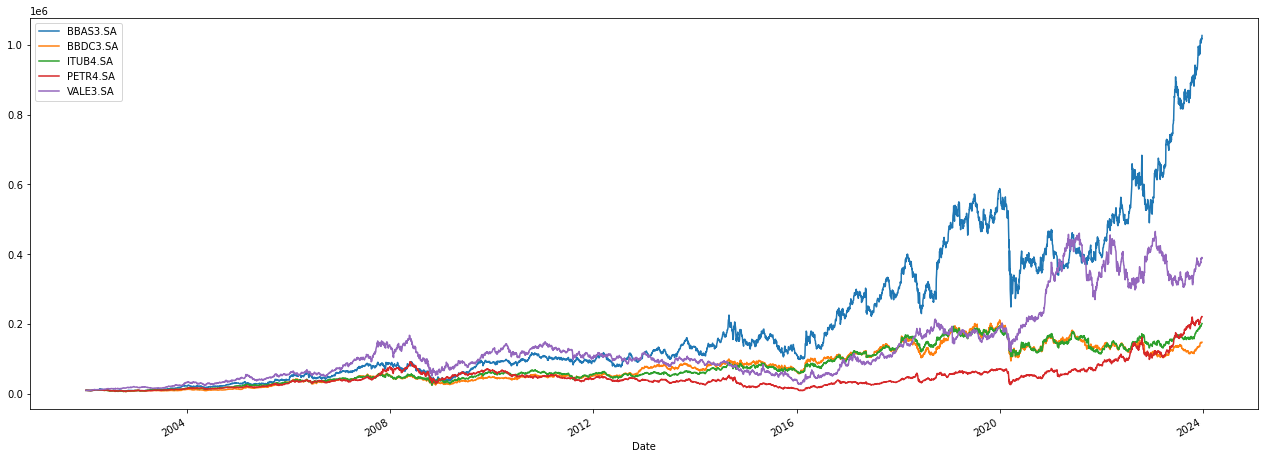

In [69]:
result = pd.concat([df_recorte_BBAS,df_recorte_BBDC,df_recorte_ITUB,df_recorte_PETR,df_recorte_VALE],axis=1)
result.plot(figsize=(22,8))

In [70]:
result['saldo'] = result.sum(axis=1)
result

,BBAS3.SA,BBDC3.SA,ITUB4.SA,PETR4.SA,VALE3.SA,saldo
Date,,,,,,
2002-01-01,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5.000000e+04
2002-01-02,1.017941e+04,10000.000000,10455.133462,10019.550735,9807.690035,5.046178e+04
2002-01-03,1.033994e+04,10076.136239,10340.926014,10087.978308,9961.534110,5.080652e+04
2002-01-04,1.010387e+04,10038.065798,10171.032257,10025.416866,10173.075763,5.051146e+04
2002-01-07,9.877238e+03,10076.136239,10057.963310,10244.379638,10173.075763,5.042879e+04
...,...,...,...,...,...,...
2023-12-21,1.005864e+06,145242.636665,194370.189236,215911.255318,388433.539148,1.949821e+06
2023-12-22,1.008643e+06,145603.647630,197452.561925,217987.905031,385506.526417,1.955193e+06
2023-12-26,1.017907e+06,146184.114477,199468.030647,221488.542424,386869.129744,1.971916e+06


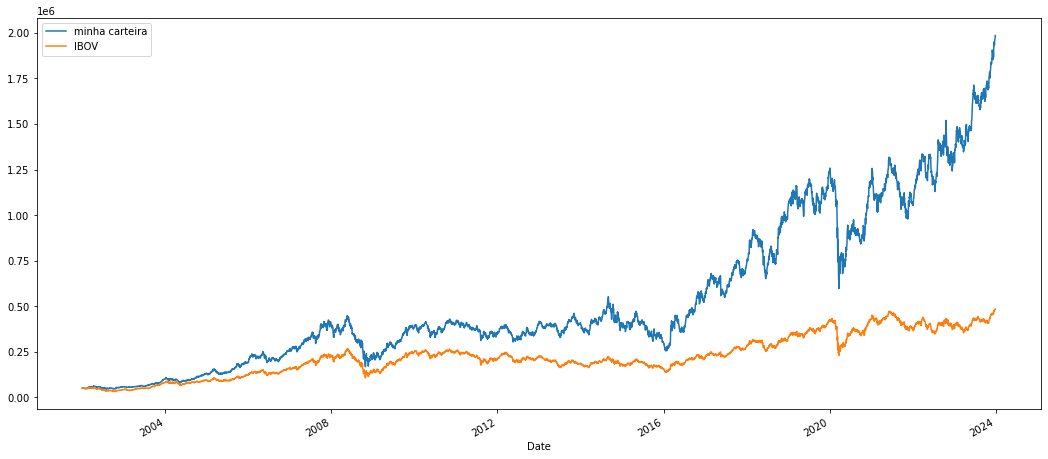

In [71]:
result["saldo"].plot(figsize=(18,8), label='minha carteira')
ibov_normalizado.plot(label="IBOV")
plt.legend()